In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pacmap
from hdbscan import HDBSCAN
import shap

In [37]:
sns.set(style="whitegrid")
colors = sns.color_palette("Set1")

In [38]:
X = pd.read_csv('../../data/clean_RawData.csv')

if 'INDEX' in X.columns:
    X = X.drop('INDEX', axis=1)
if 'Unnamed: 0' in X.columns:
    X = X.drop('Unnamed: 0', axis=1)
feature_names = X.columns.tolist()
print(feature_names)

X.fillna(X.mean(), inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X.head())

['XMEAS1', 'XMEAS2', 'XMEAS3', 'XMEAS4', 'XMEAS5', 'XMEAS6', 'XMEAS7', 'XMEAS8', 'XMEAS9', 'XMEAS10', 'XMEAS11', 'XMEAS12', 'XMEAS13', 'XMEAS14', 'XMEAS15', 'XMEAS16', 'XMEAS17', 'XMEAS18', 'XMEAS19', 'XMEAS20', 'XMEAS21', 'XMEAS22', 'XMV1', 'XMV2', 'XMV3', 'XMV4', 'XMV6', 'XMV7', 'XMV8', 'XMV10', 'XMV11']
     XMEAS1       XMEAS2       XMEAS3    XMEAS4     XMEAS5     XMEAS6   
0  0.271033  3649.739415  4451.320791  9.223142  32.392900  47.559754  \
1  0.270826  3653.341885  4488.640140  9.211980  32.501953  47.374855   
2  0.270474  3688.113265  4432.832766  9.235690  32.402838  47.817088   
3  0.272127  3651.680041  4459.268940  9.192009  31.876790  47.869249   
4  0.270939  3636.329271  4460.409756  9.277992  32.424754  47.509322   

        XMEAS7     XMEAS8      XMEAS9   XMEAS10  ...    XMEAS22       XMV1   
0  2798.975799  64.995825  122.898796  0.197826  ...  92.262531  62.806984  \
1  2800.296214  65.091251  122.877519  0.196092  ...  92.492697  62.819324   
2  2802.647777  64.

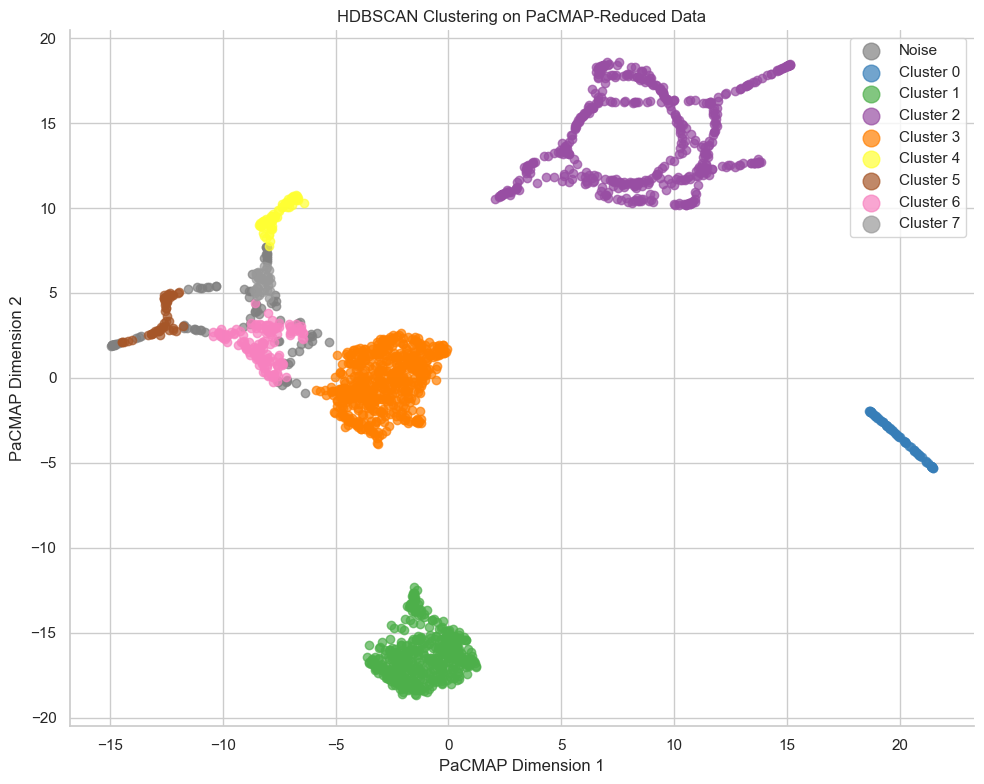

In [39]:
# PaCMAP
embedding = pacmap.PaCMAP() 
X_pacmap = embedding.fit_transform(X_scaled)

# HDBSCAN
clusterer = HDBSCAN(min_cluster_size=30, min_samples=20)
cluster_labels = clusterer.fit_predict(X_pacmap)

# PaCMAP and HDBSCAN Plot
plt.figure(figsize=(10, 8))
unique_clusters = np.unique(cluster_labels)
for i, cluster in enumerate(unique_clusters):
    if cluster == -1: 
        color = 'grey'
        label = 'Noise'
    else:
        color = colors[i % len(colors)]
        label = f'Cluster {cluster}'
    plt.scatter(X_pacmap[cluster_labels == cluster, 0], 
                X_pacmap[cluster_labels == cluster, 1], 
                c=[color], 
                label=label,
                alpha=0.7)

plt.xlabel('PaCMAP Dimension 1')
plt.ylabel('PaCMAP Dimension 2')
plt.title('HDBSCAN Clustering on PaCMAP-Reduced Data')
plt.legend(markerscale=2)
sns.despine()
plt.tight_layout()
plt.show()

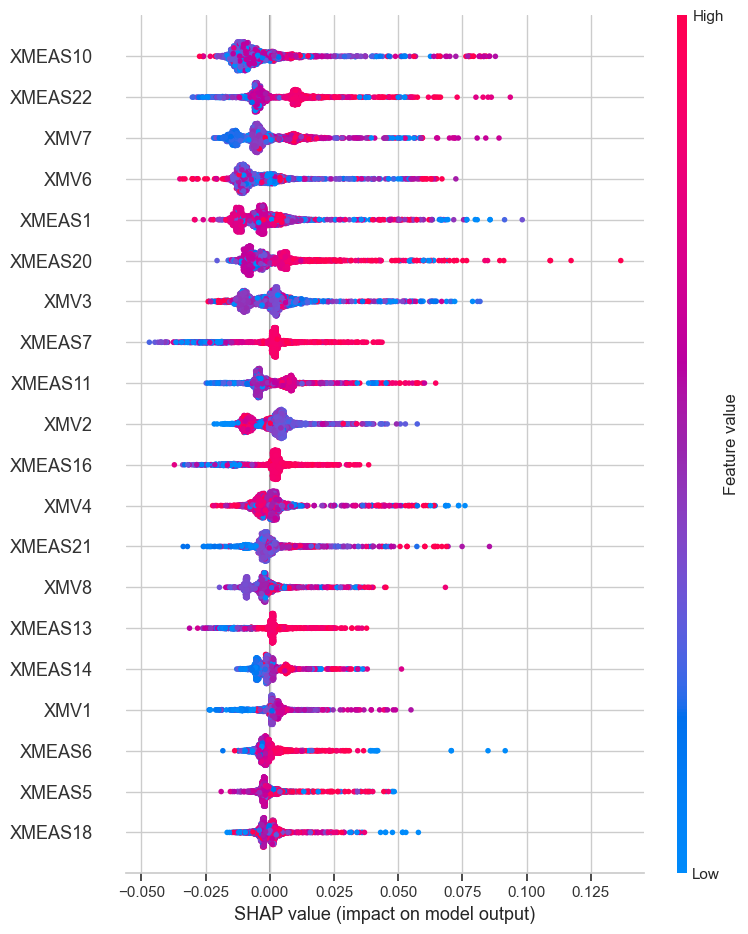

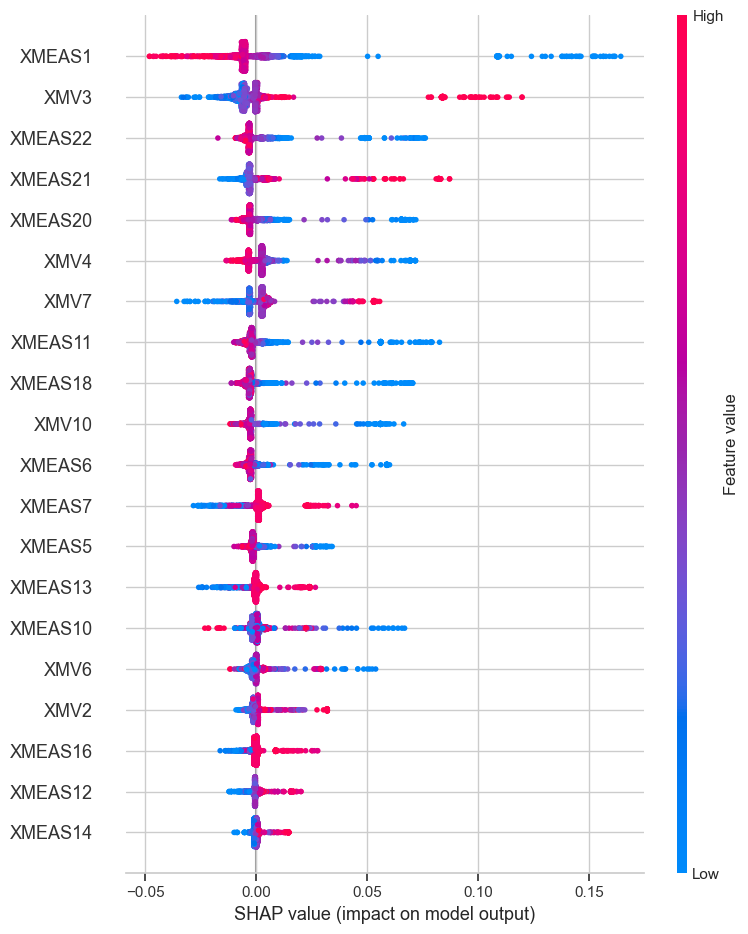

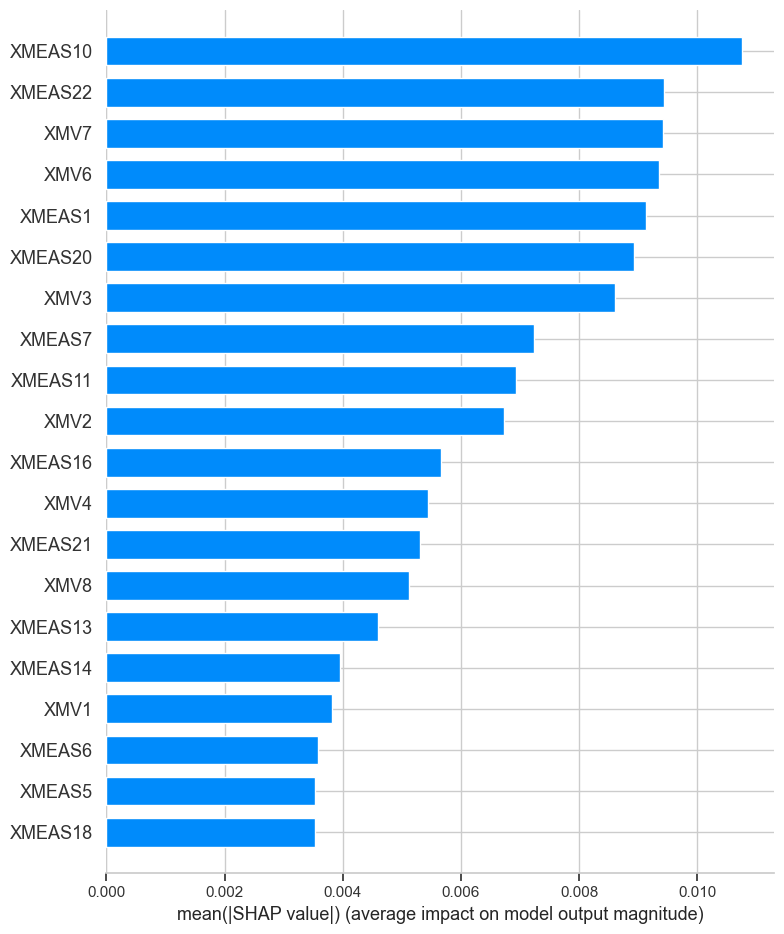

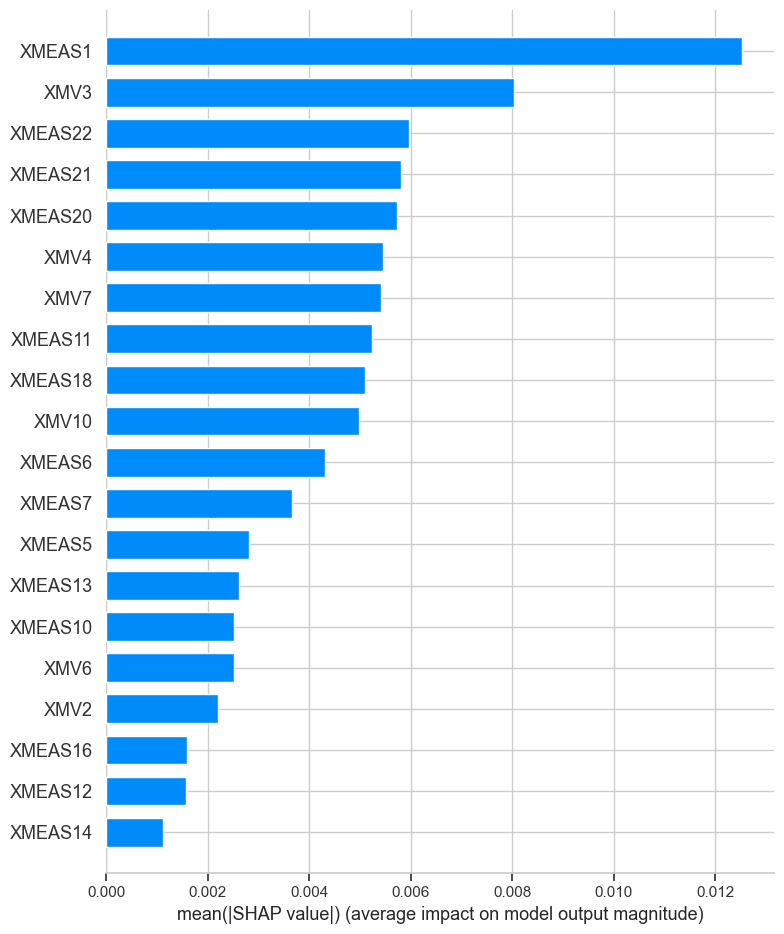

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Train a model
model = RandomForestClassifier()
model.fit(X_scaled, cluster_labels)

# Step 2: Apply SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_scaled)

# Step 3: Analyze SHAP values
# For instance, a summary plot for the first cluster
shap.summary_plot(shap_values[0], X_scaled, feature_names=feature_names)
shap.summary_plot(shap_values[1], X_scaled, feature_names=feature_names)
shap.summary_plot(shap_values[0], X_scaled, feature_names=feature_names, plot_type='bar')
shap.summary_plot(shap_values[1], X_scaled, feature_names=feature_names, plot_type='bar')